In [3]:
file = 'INF2178_A3_data.csv'

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import shapiro, levene
from sklearn.linear_model import LinearRegression

data = pd.read_csv(file)

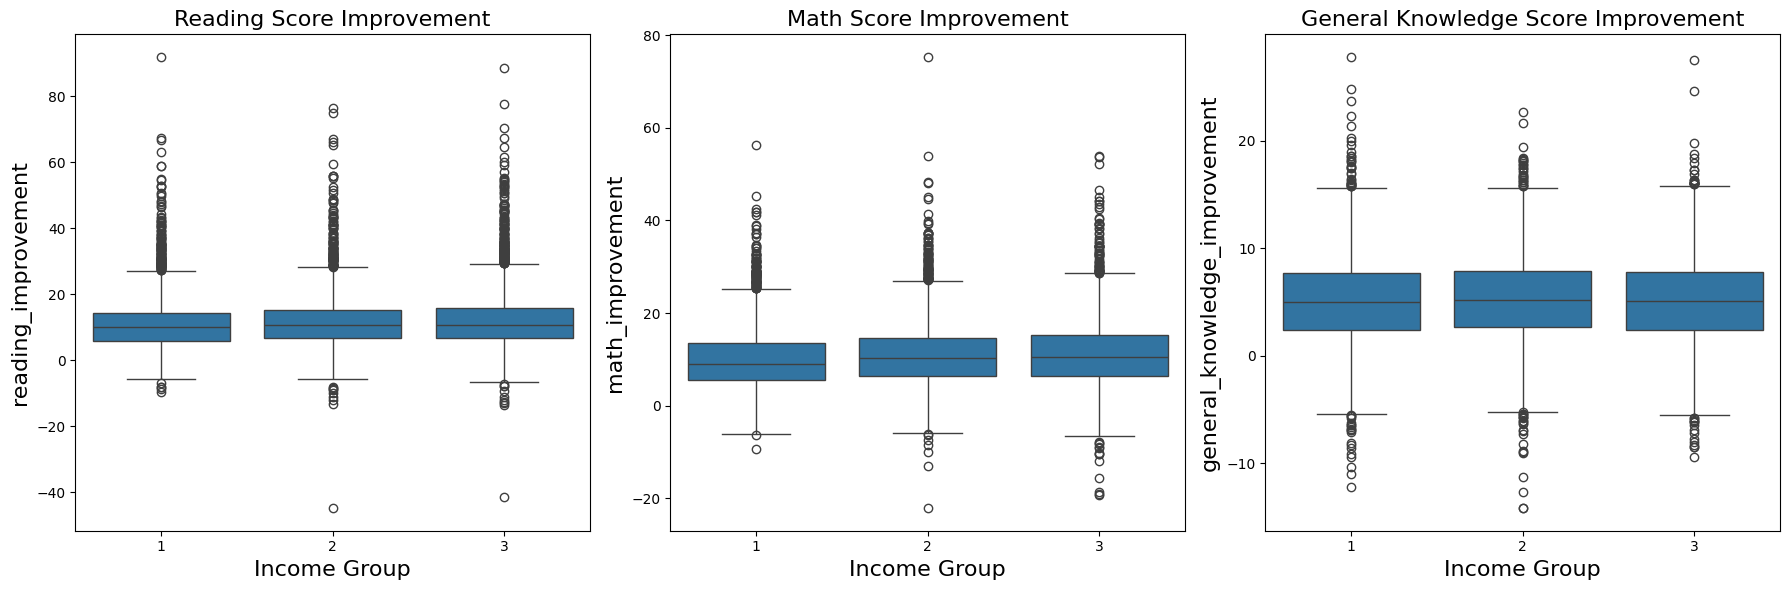

In [5]:
# Calculate the score improvements from fall to spring
data['reading_improvement'] = data['springreadingscore'] - data['fallreadingscore']
data['math_improvement'] = data['springmathscore'] - data['fallmathscore']
data['general_knowledge_improvement'] = data['springgeneralknowledgescore'] - data['fallgeneralknowledgescore']

# Boxplots of score improvements across income groups
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
improvements = ['reading_improvement', 'math_improvement', 'general_knowledge_improvement']
titles = ['Reading Score Improvement', 'Math Score Improvement', 'General Knowledge Score Improvement']

for i, j in enumerate(improvements):
    sns.boxplot(x='incomegroup', y=j, data=data, ax=axs[i])
    axs[i].set_title(titles[i], fontsize = 16)
    # Adjust the font size
    axs[i].set_xlabel('Income Group', fontsize=16)
    axs[i].set_ylabel(j, fontsize=16)
plt.tight_layout()
plt.show()

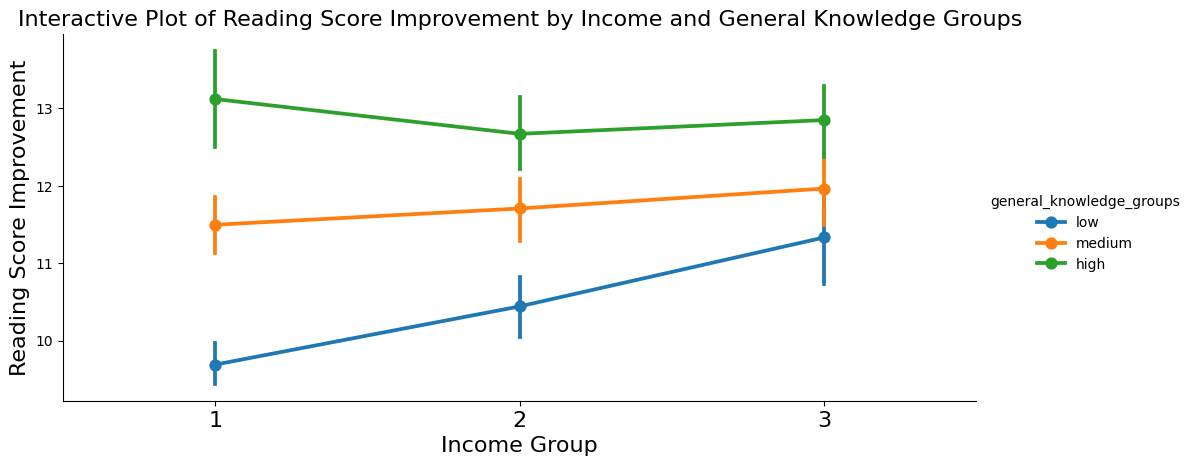

In [12]:
# Divide the general knowledge scores into groups based on quantiles
data['general_knowledge_groups'] = pd.qcut(data['fallgeneralknowledgescore'], 3, labels=['low', 'medium', 'high'])

# Plot the interaction plot for reading score improvement by income group and general knowledge levels
plot = sns.catplot(x="incomegroup", y="reading_improvement", hue="general_knowledge_groups", kind="point", data=data, height=5, aspect=2)
plt.title('Interactive Plot of Reading Score Improvement by Income and General Knowledge Groups', fontsize = 16)
plt.xlabel('Income Group', fontsize = 16)
plt.ylabel('Reading Score Improvement', fontsize = 16)
plt.xticks(fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

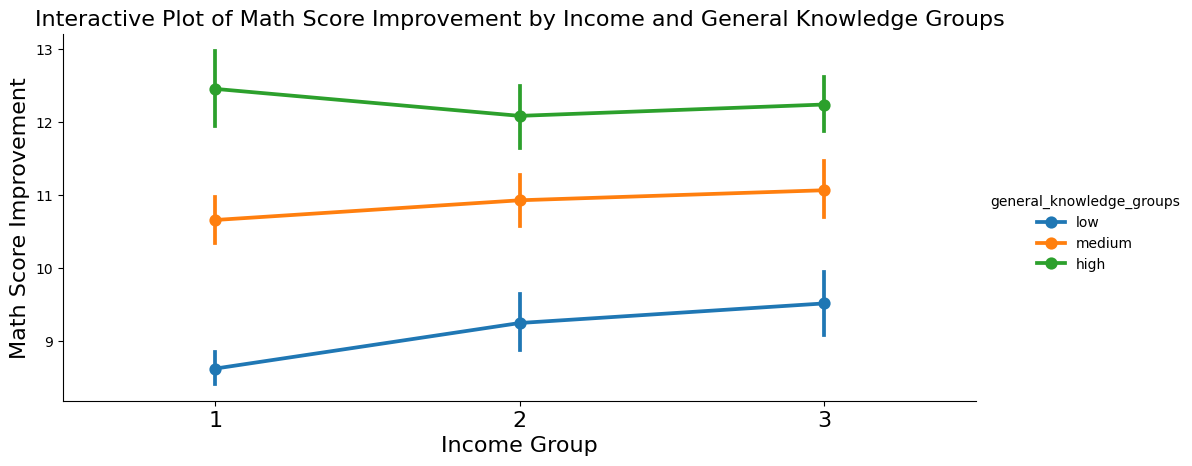

In [13]:

# Plot the interaction plot for math score improvement by income group and general knowledge levels
plot = sns.catplot(x="incomegroup", y="math_improvement", hue="general_knowledge_groups", kind="point", data=data, height=5, aspect=2)
plt.title('Interactive Plot of Math Score Improvement by Income and General Knowledge Groups', fontsize = 16)
plt.xlabel('Income Group', fontsize = 16)
plt.ylabel('Math Score Improvement', fontsize = 16)
plt.xticks(fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

In [11]:
# ANCOVA assumptions tests
def calculate_residuals(x, y):
    # Fit a linear regression model and calculates residuals
    model = LinearRegression()
    model.fit(x, y)
    predicted = model.predict(x)
    residuals = y - predicted
    return residuals

# Prepare data for residuals calculation
data['residualsR'] = calculate_residuals(data[['fallreadingscore', 'fallgeneralknowledgescore']], data['springreadingscore'])
data['residualsM'] = calculate_residuals(data[['fallmathscore', 'fallgeneralknowledgescore']], data['springmathscore'])

def test_assumptions(data, residuals_column):
    #Perform Shapiro-Wilk test for normality and Levene's test for homogeneity of variances on residuals
    normality = shapiro(data[residuals_column])
    grouped_residuals = [group[1] for group in data.groupby('incomegroup')[residuals_column]]
    homogeneity = levene(*grouped_residuals)
    return normality, homogeneity

# Test assumptions for reading scores
normalityR, homogeneityR = test_assumptions(data, 'residualsR')
# Test assumptions for math scores
normalityM, homogeneityM = test_assumptions(data, 'residualsM')

print(f"Reading Scores: Normality: {normalityR}, Homogeneity: {homogeneityR}")

Reading Scores: Normality: ShapiroResult(statistic=0.9119252562522888, pvalue=0.0), Homogeneity: LeveneResult(statistic=26.707323433241076, pvalue=2.673286671804338e-12)
Math Scores: - Normality: ShapiroResult(statistic=0.9654783606529236, pvalue=0.0), Homogeneity: LeveneResult(statistic=29.68109288260128, pvalue=1.385573281770904e-13)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
print(f"Math Scores: - Normality: {normalityM}, Homogeneity: {homogeneityM}")

Math Scores: - Normality: ShapiroResult(statistic=0.9654783606529236, pvalue=0.0), Homogeneity: LeveneResult(statistic=29.68109288260128, pvalue=1.385573281770904e-13)


In [15]:
# ANCOVA for reading score improvements
ancova_reading = ols('reading_improvement ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()
ancova_reading_result = sm.stats.anova_lm(ancova_reading, typ=2)
print(ancova_reading.summary())
print(ancova_reading_result)


                             OLS Regression Results                            
Dep. Variable:     reading_improvement   R-squared:                       0.023
Model:                             OLS   Adj. R-squared:                  0.023
Method:                  Least Squares   F-statistic:                     95.49
Date:                 Thu, 21 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                         03:54:00   Log-Likelihood:                -41730.
No. Observations:                11933   AIC:                         8.347e+04
Df Residuals:                    11929   BIC:                         8.350e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

In [16]:
# ANCOVA for math score improvements
ancova_math = ols('math_improvement ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()
ancova_math_result = sm.stats.anova_lm(ancova_math, typ=2)
print(ancova_math.summary())
print(ancova_math_result)

                            OLS Regression Results                            
Dep. Variable:       math_improvement   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     200.0
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                        03:54:05   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11929   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             